#### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models 
from sklearn.ensemble import GradientBoostingRegressor

# train test split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

#### Data

In [2]:
# data
df = pd.read_csv("tar_enc_dataset.csv")

In [3]:
# feature reduction
df = df.drop(['Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ'], axis=1)

#### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9) 
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

#### Models

In [8]:
# Gradient Boosting Scaled
gb_scaled = GradientBoostingRegressor()
gb_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = gb_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (Scaled):", mae_scaled)

Mean Absolute Error (Scaled): 0.3664917764984871


In [9]:
# Gradient Boosting PCA 
gb_pca = GradientBoostingRegressor()
gb_pca.fit(x_train_pca, y_train)
y_pred_pca = gb_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.4982462131362695


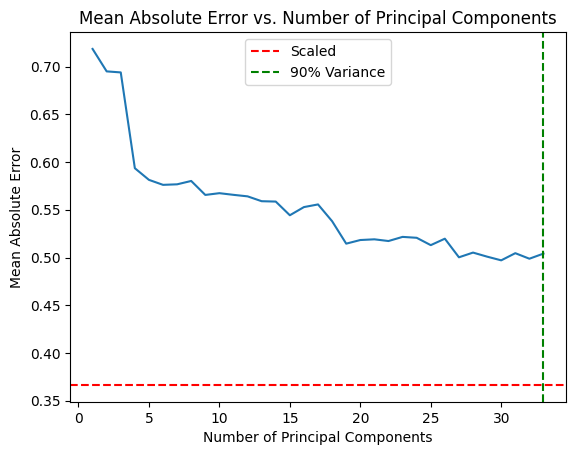

In [10]:
# Compare the performance of different numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    gb = GradientBoostingRegressor()
    gb.fit(x_train_pca, y_train)
    y_pred = gb.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(30, 0.4970237486331405)

In [12]:
mae_values

[0.7185404974518247,
 0.6950127168406585,
 0.6939208613731696,
 0.593549282246784,
 0.5813500971290604,
 0.5761155808765139,
 0.5766752657512855,
 0.5801975488100057,
 0.565553676911995,
 0.5673928670249938,
 0.5656519784288989,
 0.5640667201053479,
 0.5589790849456198,
 0.5586001665845245,
 0.5442607617895888,
 0.5528235773791691,
 0.5556102191007127,
 0.5380257479142231,
 0.5145048854672303,
 0.5183052580083559,
 0.5190507523535026,
 0.5172569013073843,
 0.5215948890132021,
 0.520653756627389,
 0.5129412701724325,
 0.5197115613953079,
 0.5002079160406556,
 0.5051484406677771,
 0.5008883047774528,
 0.4970237486331405,
 0.5045281958309226,
 0.4987291672358817,
 0.5040803061054328]